In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from linearmodels.panel import PanelOLS, compare

# Load data
Imports_DF = pd.read_csv("C:/Users/stunt/OneDrive/Desktop/UCLA Material/Course Material/Machine Learning/Assignments/Wk2/imports85_modified.csv")
# Data Overview
Imports_DF.head()

,symboling,normalized-losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,...,engine.size,fuel.system,bore,stroke,compression-ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,10.5,27.0,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,10.5,27.0,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,28.5,26.0,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,12.0,30.0,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,27.0,22.0,17450.0


In [3]:
Imports_DF = Imports_DF.rename(columns={'city.mpg': 'city_mpg'})
# Regress fuel efficiency on horsepower without fixed effects
reg_wofe = sm.ols(formula = 'city_mpg ~ horsepower', data = Imports_DF).fit()
print(reg_wofe.summary())

                            OLS Regression Results                            
Dep. Variable:               city_mpg   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     10.25
Date:                Fri, 05 Jan 2024   Prob (F-statistic):            0.00159
Time:                        15:39:22   Log-Likelihood:                -689.24
No. Observations:                 203   AIC:                             1382.
Df Residuals:                     201   BIC:                             1389.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.2295      1.433      8.534      0.0

                            OLS Regression Results                            
Dep. Variable:               city_mpg   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     466.3
Date:                Fri, 05 Jan 2024   Prob (F-statistic):           4.92e-76
Time:                        15:39:42   Log-Likelihood:                -518.28
No. Observations:                 203   AIC:                             1043.
Df Residuals:                     200   BIC:                             1053.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     43.8952      1.235     35.542      0.0

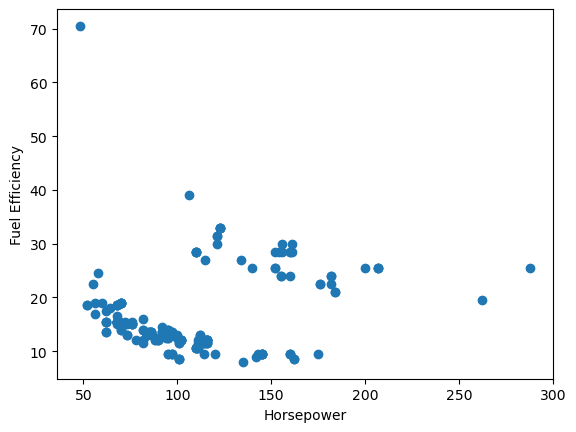

In [4]:
fig, ax = plt.subplots()
ax.scatter(Imports_DF['horsepower'], Imports_DF['city_mpg'])
ax.set_xlabel('Horsepower')
ax.set_ylabel('Fuel Efficiency')

Imports_DF['I_cylinder'] = np.where((Imports_DF['num.of.cylinders'] == "two") | \
(Imports_DF['num.of.cylinders'] == "four"), 1, 0)
# Regression with a fixed effect
reg_fe = sm.ols(formula = 'city_mpg ~ horsepower + I_cylinder', data = Imports_DF).fit()
print(reg_fe.summary())

## Within Transfromation

In [6]:
Imports_DF['groupmean_city_mpg'] = Imports_DF.groupby('I_cylinder').city_mpg.transform('mean')
Imports_DF['groupmean_horsepower'] = Imports_DF.groupby('I_cylinder').horsepower.transform('mean')
# Demean variables and run regression
Imports_DF['demeaned_city_mpg'] = Imports_DF['city_mpg'] - Imports_DF['groupmean_city_mpg']
Imports_DF['demeaned_horsepower'] = Imports_DF['horsepower'] - Imports_DF['groupmean_horsepower']
reg_transform = sm.ols(formula = 'demeaned_city_mpg ~ demeaned_horsepower', data = Imports_DF).fit()
print(reg_transform.summary())

                            OLS Regression Results                            
Dep. Variable:      demeaned_city_mpg   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     190.4
Date:                Fri, 05 Jan 2024   Prob (F-statistic):           6.51e-31
Time:                        15:41:21   Log-Likelihood:                -518.29
No. Observations:                 203   AIC:                             1041.
Df Residuals:                     201   BIC:                             1047.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.0190    

## Trading Strategy improvements

In [14]:
StockRetAcct_DF = pd.read_csv("C:/Users/stunt/OneDrive/Desktop/UCLA Material/Course Material/Machine Learning/Assignments/Wk2/StockRetAcct_DT (1).csv")
StockRetAcct_DF
# Compute the negative lnInv ﴾since it is negatively correlated with the return﴿
StockRetAcct_DF['neg_lnInv'] = -StockRetAcct_DF['lnInv']
# Define Fama‑MacBeth regression
def ols_coef(x,formula):
    return sm.ols(formula,data=x).fit().params
# Excess return
StockRetAcct_DF['ExRet']=np.exp(StockRetAcct_DF.lnAnnRet)- \
np.exp(StockRetAcct_DF.lnRf)
# Run regression
res = (StockRetAcct_DF.groupby('year').apply(ols_coef,'ExRet ~ neg_lnInv'))
# Print the result
print('Mean Return: ' , str(res['neg_lnInv'].mean())+'\n',
'Std Dev: ', str(res['neg_lnInv'].std())+'\n',
'Sharpe Ratio ' , str(res['neg_lnInv'].mean()/
res['neg_lnInv'].std())+'\n',
't‑stat: ' , str(35**.5*(res['neg_lnInv'].mean())/
res['neg_lnInv'].std()), sep="\n")

Mean Return: 
0.08679146319781361

Std Dev: 
0.1486441075941612

Sharpe Ratio 
0.5838876804641183

t‑stat: 
3.4543261019946994


In [15]:
# Adding industry dummies
StockRetAcct_DF['Industry']=StockRetAcct_DF['ff_ind'].astype(object)
# Fama‑MacBeth regression with dummies
res1 = (StockRetAcct_DF.groupby('year').apply(ols_coef,\
'ExRet ~ neg_lnInv + Industry'))
# Print the result ﴾without industry dummies﴿
print('Mean Return: ' , str(res1['neg_lnInv'].mean())+'\n',
'Std Dev: ', str(res1['neg_lnInv'].std())+'\n',
'Sharpe Ratio ' , str(res1['neg_lnInv'].mean()/
res1['neg_lnInv'].std())+'\n',
't‑stat: ' , str(35**.5*(res1['neg_lnInv'].mean())/
res1['neg_lnInv'].std()), sep="\n")

Mean Return: 
0.08257761689795624

Std Dev: 
0.10196423000688846

Sharpe Ratio 
0.8098684891003197

t‑stat: 
4.791246595335833


c:\Users\stunt\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Cumulative Return'),
 Text(0.5, 1.0, 'Base specification (blue) vs. industry FEs (red)')]

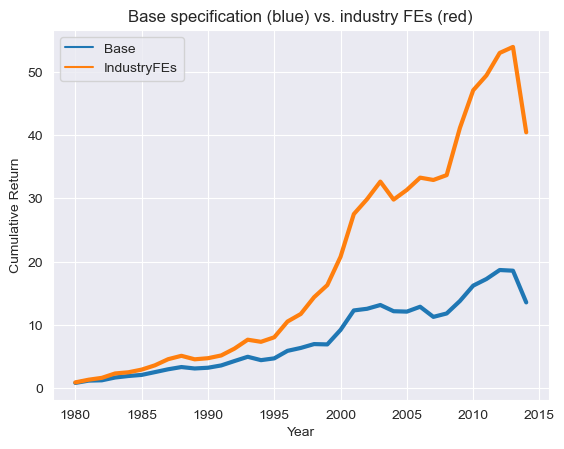

In [17]:
# Drop missing observations
LastDate = StockRetAcct_DF[StockRetAcct_DF['year']==2014].dropna()
# Add constant, sort DataFrame columns based on column names to get the
# constant first.
LastDate = LastDate[['neg_lnInv']].assign(c=1).sort_index(axis=1)
# Create dummy variables for each industry. We drop the last column because we
# include a constant to avoid multicollinearity
LastDate = LastDate.join(pd.get_dummies(StockRetAcct_DF.Industry).iloc[:,:-1])
portweights_neg_lnInv = np.matmul(np.linalg.inv(np.matmul(LastDate.transpose().\
values,LastDate.values)),LastDate.transpose().values)
# lnInv is the second row
portweights_neg_lnInv = np.matmul(np.array([0,1,0,0,0,0,0,0,0,0,0,0,0]).T,
portweights_neg_lnInv)
# scale portfolio weights to get 15% standard deviation of returns
portweights_neg_lnInv = portweights_neg_lnInv*0.15/res1['neg_lnInv'].std()
# for plotting, get the scaled excess portfolio returns
neg_lnInv_ret = res1['neg_lnInv']*0.15/res1['neg_lnInv'].std()
# create cumulative log return series
cum_ret_neg_lnInv = pd.DataFrame.cumsum(np.log(1 + neg_lnInv_ret))
# get "old" simple investment strategy returns
# port_ret = StockRetAcct_DF.groupby﴾'year'﴿.apply﴾ols_coef,'ExRet ~ neg_lnInv'﴿.iloc[:,1]
neg_lnInv_old_ret = pd.DataFrame.cumsum(np.log(1+res['neg_lnInv']*0.15/res['neg_lnInv'].std()))
summary = pd.DataFrame()
summary['Base'] = np.exp(neg_lnInv_old_ret)
summary['IndustryFEs'] = np.exp(cum_ret_neg_lnInv)
# Plot base specification vs. industry FEs
sns.set_style('darkgrid')
plt.figure()
ax=sns.lineplot(data=summary,dashes = False,linewidth = 3)
ax.set(xlabel = 'Year',
ylabel = 'Cumulative Return',
title = "Base specification (blue) vs. industry FEs (red)")

## Predicting Firm level return variance

In [19]:
# Lead rv
StockRetAcct_DF.sort_values(['FirmID','year'], ascending=[True, True], inplace=True)
StockRetAcct_DF['F1_rv'] = StockRetAcct_DF.groupby('FirmID')['rv'].shift(-1)
StockRetAcct_DF['F5_rv'] = StockRetAcct_DF.groupby('FirmID')['rv'].shift(-5)
# Set panel
StockRetAcct_DF=StockRetAcct_DF[~StockRetAcct_DF.ff_ind.isna()]
StockRetAcct_DF['year_col'] = StockRetAcct_DF['year']
StockRetAcct_DF = StockRetAcct_DF.set_index(['FirmID','year'])
# Regression without FE + without clustering
reg1 = PanelOLS.from_formula(formula='F1_rv ~ 1 + rv', data=StockRetAcct_DF).fit()
# Regression without FE + with clustering std error at the industry and year level
reg2 = PanelOLS.from_formula(formula='F1_rv ~ 1 + rv',
data = StockRetAcct_DF).fit(cov_type = 'clustered', cluster_entity=True, cluster_time=True)
# Regression with industry and year FEs + without clustering
reg3 = PanelOLS.from_formula(formula=\
'F1_rv ~ 1 + rv + Industry + TimeEffects',
data = StockRetAcct_DF).fit()
# Regression with industry and year FEs + with clustering std error at the industry and year level
reg4 = PanelOLS.from_formula(formula=\
'F1_rv ~ 1 + rv + Industry + TimeEffects',
data = StockRetAcct_DF).fit(cov_type = 'clustered', cluster_entity=True, cluster_time=True)
print(compare({'1':reg1,'2':reg2,'3':reg3,'4':reg4}))

c:\Users\stunt\anaconda3\lib\site-packages\linearmodels\panel\model.py:1185: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
c:\Users\stunt\anaconda3\lib\site-packages\linearmodels\panel\model.py:1185: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
c:\Users\stunt\anaconda3\lib\site-packages\linearmodels\panel\model.py:1185: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
c:\Users\stunt\anaconda3\lib\site-packages\linearmodels\panel\model.py:1185: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                                 Model Comparison                                
                                     1             2              3             4
---------------------------------------------------------------------------------
Dep. Variable                    F1_rv         F1_rv          F1_rv         F1_rv
Estimator                     PanelOLS      PanelOLS       PanelOLS      PanelOLS
No. Observations                 55654         55654          55654         55654
Cov. Est.                   Unadjusted     Clustered     Unadjusted     Clustered
R-squared                       0.2629        0.2629         0.3951        0.3951
R-Squared (Within)              0.0017        0.0017        -0.0385       -0.0385
R-Squared (Between)             0.5283        0.5283         0.5985        0.5985
R-Squared (Overall)             0.2629        0.2629         0.2717        0.2717
F-statistic                  1.985e+04     1.985e+04         3026.4        3026.4
P-value (F-stat)

In [20]:
# Lag return
StockRetAcct_DF.sort_values(['FirmID','year'], ascending=[True, True], inplace=True)
StockRetAcct_DF['L1_ExRet'] = StockRetAcct_DF.groupby('FirmID')['ExRet'].shift(1)
# Regression without FE + without clustering
reg5 = PanelOLS.from_formula(formula='F5_rv ~ 1 + rv + lnBM + lnProf + lnLever \
+ lnIssue + lnInv + L1_ExRet',
data=StockRetAcct_DF).fit()
# Regression without FE + with clustering std error at the industry and year level
reg6 = PanelOLS.from_formula(formula='F5_rv ~ 1 + rv + lnBM + lnProf + lnLever \
+ lnIssue + lnInv + L1_ExRet',
data = StockRetAcct_DF).fit(cov_type = 'clustered', cluster_entity=True, cluster_time=True)
# Regression with industry and year FEs + without clustering
reg7 = PanelOLS.from_formula(formula='F5_rv ~ 1 + rv + lnBM + lnProf + lnLever \
+ lnIssue + lnInv + L1_ExRet + Industry + TimeEffects',
data = StockRetAcct_DF).fit()
# Regression with industry and year FEs + with clustering std error at the industry and year level
reg8 = PanelOLS.from_formula(formula='F5_rv ~ 1 + rv + lnBM + lnProf + lnLever \
+ lnIssue + lnInv + L1_ExRet + Industry + TimeEffects',
data = StockRetAcct_DF).fit(cov_type = 'clustered', cluster_entity=True, cluster_time=True)
print(compare({'1':reg5,'2':reg6,'3':reg7,'4':reg8}))

c:\Users\stunt\anaconda3\lib\site-packages\linearmodels\panel\model.py:1185: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
c:\Users\stunt\anaconda3\lib\site-packages\linearmodels\panel\model.py:1185: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
c:\Users\stunt\anaconda3\lib\site-packages\linearmodels\panel\model.py:1185: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
c:\Users\stunt\anaconda3\lib\site-packages\linearmodels\panel\model.py:1185: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                                 Model Comparison                                
                                     1             2              3             4
---------------------------------------------------------------------------------
Dep. Variable                    F5_rv         F5_rv          F5_rv         F5_rv
Estimator                     PanelOLS      PanelOLS       PanelOLS      PanelOLS
No. Observations                 32579         32579          32579         32579
Cov. Est.                   Unadjusted     Clustered     Unadjusted     Clustered
R-squared                       0.0515        0.0515         0.1242        0.1242
R-Squared (Within)             -0.0046       -0.0046        -0.0926       -0.0926
R-Squared (Between)             0.1629        0.1629         0.1665        0.1665
R-Squared (Overall)             0.0515        0.0515         0.0387        0.0387
F-statistic                     252.69        252.69         256.20        256.20
P-value (F-stat)